# Ensemble Learning Workshop
www.PortlandDataScience.com

This notebook loacted [https://github.com/TheGrimmScientist/EnsembleWorkshop](https://github.com/TheGrimmScientist/EnsembleWorkshop)

View it online [here](http://nbviewer.ipython.org/github/TheGrimmScientist/EnsembleWorkshop/blob/master/Ensemble%20Learning%20Workshop.ipynb)

## Digits dataset

In [1]:
%pylab inline
import numpy as np
import sklearn as sk

Populating the interactive namespace from numpy and matplotlib


In [2]:
""" Import digits dataset. """
# http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
"""  Explore what type of data structure `digits` is. """
print type(digits)
print digits.keys()
print type(digits.data)
print digits.data[0].shape
print type(digits.images)
print digits.images[0].shape
# and the docs are here: `digits.DESCR`

<class 'sklearn.datasets.base.Bunch'>
['images', 'data', 'target_names', 'DESCR', 'target']
<type 'numpy.ndarray'>
(64,)
<type 'numpy.ndarray'>
(8, 8)


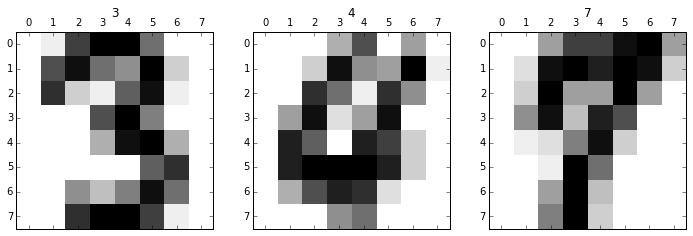

In [5]:
""" Plot 3 random digits. """
N = len(digits.data)
samples_to_show = np.random.randint(0,N,3)
f, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
f.set_figwidth(12)
ax1.set_title(digits.target[samples_to_show[0]])
ax1.matshow(digits.images[samples_to_show[0]], cmap=cm.gray_r)

ax2.set_title(digits.target[samples_to_show[1]])
ax2.matshow(digits.images[samples_to_show[1]], cmap=cm.gray_r)

ax3.set_title(digits.target[samples_to_show[2]])
ax3.matshow(digits.images[samples_to_show[2]], cmap=cm.gray_r)

### Data munging challenges:

In [22]:
# what is the label of the 8th sample?
import random
test_portion = 0.25
data = np.array(digits.data)
N = len(data)
test_set_i = np.array(sorted(random.sample(xrange(N), int(test_portion*N))))
test_target = np.array(digits.target)[test_set_i]
test_set = data[test_set_i]
train_set_i = np.array([i for i in range(N) if i not in test_set_i])
train_set = data[train_set_i]
train_target = np.array(digits.target)[train_set_i]
print(test_set)
print(train_set)

[[  0.   0.   7. ...,   9.   0.   0.]
 [  0.   0.   0. ...,   4.   0.   0.]
 [  0.   0.   7. ...,   0.   0.   0.]
 ..., 
 [  0.   0.   0. ...,   4.   0.   0.]
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]
[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   4. ...,   9.   0.   0.]
 [  0.   0.   6. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]]


In [6]:
# what does that 8th sample look like?

In [7]:
# how many of each class are there?

In [8]:
# are the classes given sequentially, or in a random order?

## Decision Tree
* See [this notebook](http://nbviewer.ipython.org/github/TheGrimmScientist/SlidesFromTalks/blob/master/2014_10_15_DecisionTreeWorkshop/Presentation.ipynb#Decision-Trees-in-SKLearn:) for explanation on `dot` command

In [4]:
from sklearn import tree

In [5]:
""" Train decision tree on digits data set """
clf = tree.DecisionTreeClassifier(max_depth=2,criterion="entropy") # construct a decision tree.
clf.fit(digits.data,digits.target)  # train it on the dataset

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')

In [7]:
""" Print to file, and generate image of tree.  Be sure to have GraphViz installed."""
dot_file = tree.export_graphviz(clf.tree_, out_file='tree_d2.dot')  #export the tree to .dot file
print(dot_file)
dot_file.close() #close that dot file.

! dot -T png tree_d2.dot -o tree_d2.png

None


AttributeError: 'NoneType' object has no attribute 'close'

In [8]:
clf = tree.DecisionTreeClassifier(max_depth=2,criterion="entropy") # construct a decision tree.
clf.fit(digits.data,digits.target)  # train it on the dataset

features_used = [f for f in clf.tree_.feature if f != -2]

def convert_features_used_to_image_locations(features_used, clf):
    features_used_as_image = np.zeros(64)
    for f in features_used:
        features_used_as_image[f] += 1
    features_used_as_image = features_used_as_image.reshape((8,8))
    locations_of_decision_points = np.argwhere(features_used_as_image > 0)
    return [features_used_as_image, locations_of_decision_points]

[features_used_as_image, locations_of_decision_points] = convert_features_used_to_image_locations(features_used, clf)
print locations_of_decision_points

[[3 2]
 [4 4]
 [5 2]]


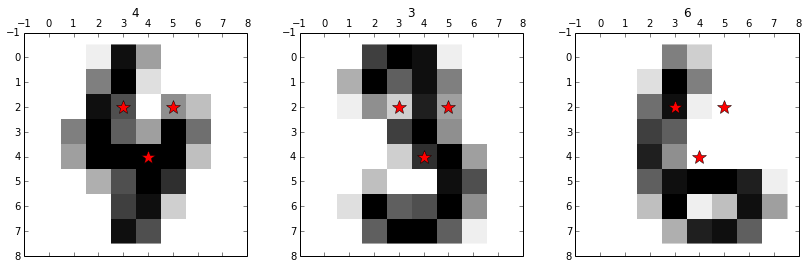

In [13]:
""" Plot 3 random digits, with decision boundaries labeled. """

def plot_decision_points_on_image(ax, features_used_as_image, locations_of_decision_points):
    [ax.plot(x,y,'r*', ms=15*features_used_as_image[x,y]) for [x,y] in locations_of_decision_points]

N = len(digits.data)
samples_to_show = np.random.randint(0,N,3)
f, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
f.set_figwidth(14)
ax1.set_title(digits.target[samples_to_show[0]])
ax1.matshow(digits.images[samples_to_show[0]], cmap=cm.gray_r)
plot_decision_points_on_image(ax1, features_used_as_image, locations_of_decision_points)

ax2.set_title(digits.target[samples_to_show[1]])
ax2.matshow(digits.images[samples_to_show[1]], cmap=cm.gray_r)
plot_decision_points_on_image(ax2, features_used_as_image, locations_of_decision_points)

ax3.set_title(digits.target[samples_to_show[2]])
ax3.matshow(digits.images[samples_to_show[2]], cmap=cm.gray_r)
plot_decision_points_on_image(ax3, features_used_as_image, locations_of_decision_points)

## Prediction Challenge 1:

# Random Forests

Generally speaking, a random forest is an ensmble learner where the weak learners are decision trees.

Original paper on decision trees:  [Ho, 1995](http://ieeexplore.ieee.org/xpl/login.jsp?arnumber=598994) ([pdf](ftp://cm.bell-labs.com/who/tkh/papers/odt.pdf))

Python's scikit-learn includes most of what we discussed pre-made in its [ensemble](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) library.

Classes to run [Boosting (via AdaBoost)](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) and [Bagging](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier) on arbitrary classifiers are given.
However, we will be focusing particularly on a few of the random forest functions given in that sklearn library.


### Bagging

In [9]:
""" Random forests made of bagged decision trees. """
# http://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, max_depth=2, n_jobs=-1)
clf = clf.fit(digits.data, digits.target)
score = clf.score(digits.data, digits.target)

In [10]:
""" Pull out decision boundaries from all contained trees. """
features_used_as_image = np.zeros((8,8))
locations_of_decision_points = []

for est in clf.estimators_:  #for each weak learner
    features_used_in_this_tree = [f for f in est.tree_.feature if f != -2]
    [features_used_as_image_in_this_tree, locations_of_decision_points_in_this_tree] = \
        convert_features_used_to_image_locations(features_used_in_this_tree, est)
    features_used_as_image += features_used_as_image_in_this_tree
    locations_of_decision_points += list(locations_of_decision_points_in_this_tree)

locations_of_decision_points = list(set([tuple(c) for c in locations_of_decision_points]))
print locations_of_decision_points

[(7, 3), (5, 4), (2, 6), (3, 6), (6, 6), (5, 2), (4, 4), (7, 4), (6, 2), (4, 3), (3, 4), (4, 2), (2, 5), (5, 3), (4, 1), (6, 5), (3, 5)]


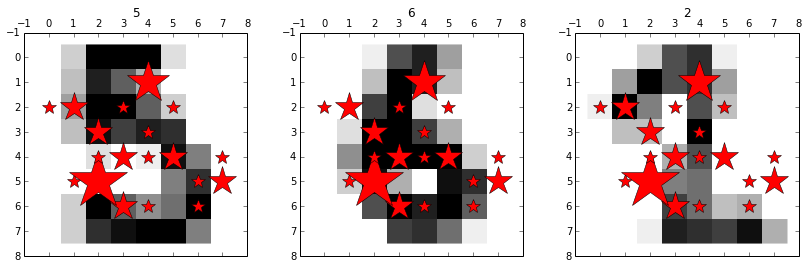

In [16]:
""" Plot 3 random digits, with decision boundaries labeled using ensemble learner. """

N = len(digits.data)
samples_to_show = np.random.randint(0,N,3)
f, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
f.set_figwidth(14)
ax1.set_title(digits.target[samples_to_show[0]])
ax1.matshow(digits.images[samples_to_show[0]], cmap=cm.gray_r)
plot_decision_points_on_image(ax1, features_used_as_image, locations_of_decision_points)

ax2.set_title(digits.target[samples_to_show[1]])
ax2.matshow(digits.images[samples_to_show[1]], cmap=cm.gray_r)
plot_decision_points_on_image(ax2, features_used_as_image, locations_of_decision_points)

ax3.set_title(digits.target[samples_to_show[2]])
ax3.matshow(digits.images[samples_to_show[2]], cmap=cm.gray_r)
plot_decision_points_on_image(ax3, features_used_as_image, locations_of_decision_points)

### Boosting

[1, 0.10000000000000001, 0.6859688195991092, 0.13671399999998357]
[1, 0.20000000000000001, 0.7037861915367484, 0.13887900000000286]
[1, 0.29999999999999999, 0.7060133630289532, 0.14798600000000306]
[1, 0.40000000000000002, 0.7149220489977728, 0.14610600000000318]
[1, 0.5, 0.7416481069042317, 0.15183999999999287]
[1, 0.59999999999999998, 0.734966592427617, 0.1511910000000114]
[1, 0.69999999999999996, 0.6948775055679287, 0.14849399999999946]
[1, 0.80000000000000004, 0.7060133630289532, 0.16311500000000478]
[1, 0.90000000000000002, 0.7126948775055679, 0.16631399999999985]
[2, 0.10000000000000001, 0.8195991091314031, 0.34290599999999927]
[2, 0.20000000000000001, 0.7928730512249443, 0.31905499999999165]
[2, 0.29999999999999999, 0.821826280623608, 0.3186139999999966]
[2, 0.40000000000000002, 0.8307349665924276, 0.316631000000001]
[2, 0.5, 0.8173719376391982, 0.3447319999999934]
[2, 0.59999999999999998, 0.8195991091314031, 0.3341179999999895]
[2, 0.69999999999999996, 0.7661469933184856, 0.326

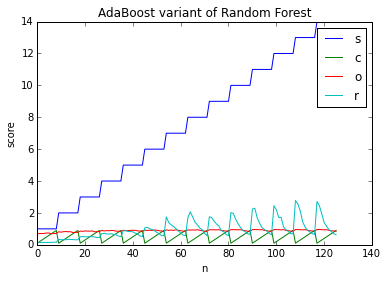

In [28]:
""" Boosting """
# http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting
from sklearn.ensemble import GradientBoostingClassifier

import time

scores = []
list_of_n_estimators = range(1,15)
learning_rates = np.array(range(1,10)) / 10.

from itertools import product

for n, lr in product(list_of_n_estimators, learning_rates): # for n_estimators in [1:15]
    
    for i in range(1):  # repeat this 5 times
        temp_scores = []
        temp_times = []
        t0 = time.clock()
        clf = GradientBoostingClassifier(n_estimators=n, learning_rate=lr,
            max_depth=10, random_state=0, max_features=3).fit(train_set, train_target)
        score = clf.score(test_set, test_target)
        t1 = time.clock()
        temp_scores.append(score)
        temp_times.append(t1-t0)
    avg_score = float(sum(temp_scores))/len(temp_scores)
    avg_time = float(sum(temp_times))/len(temp_times)
    scores.append([n, lr, avg_score, avg_time])
    print scores[-1]

print scores

plot(scores)
legend('scores', 'times')
xlabel("n")
ylabel("score")
title("AdaBoost variant of Random Forest")

#TODO: keep this.  it's getting stuck on a class, right?
#TODO: show it's max_depth=1, so it's always picking the same one var?

# Regarding learning rate:  http://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting-shrinkage


In [34]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
fig = plt.figure()
ax3d = Axes3D(fig)

x = np.array(s[0] for s in scores)
y = np.array(s[1] for s in scores)
z = np.array(s[2] for s in scores)
ax3d.scatter(x, y, z, zdir=u'z', s=20, c=u'b', depthshade=True)

TypeError: float() argument must be a string or a number

AttributeError: 'PathCollection' object has no attribute 'do_3d_projection'

sklearn on selecting the number of boosting iterations using [out-of-bag estimates](# regarding selection of number of iterations: 
http://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_oob.html#example-ensemble-plot-gradient-boosting-oob-py)

In [18]:
# Challenge: Add the time it takes to train and test a learner to the previous "n_estimators vs score" graph
# Play with the 'max features' in a similar way.  (i.e., look for a good value for it)
# What are the parameters of the best GradientBoostingClassifier you can make? 
#   (and did you split your data into train and test sets?)

In [19]:
# Graph the effect the number of estimators has on performance where n_estimators is in [1,50]

In [20]:
# Explore the relation between n_estimators and learning_rate

In [21]:
# Pick a good set of paramters (n_estimators, learning_rate, max_depth)

## Other Variants and Final Challenges:

In [22]:
# As in Ho 1995, add processed features and re-train a learner of your choice.

In [23]:
# Train/test split.  (careful so all classes are represented in both data sets)

In [24]:
""" Very random trees.  (even the decisions are random)"""
# http://scikit-learn.org/stable/modules/ensemble.html#extremely-randomized-trees
# Get ExtraTreesClassifier working on digits dataset.  Pick some good parameters

' Very random trees.  (even the decisions are random)'

In [25]:
# Compare performance of ExtraTreesClassifier to RandomForestClassifier

In [27]:
""" Play with AdaBoost or Bagging objects directly """
# if you aren't already, switch over to using the AdaBoost or Bagging Classifiers given in sklearn.ensemble to create a forest.
# Then use this framework to drop in a different classifier as a weak learner and compare your new predictor to your old random forest

' Play with AdaBoost or Bagging objects directly '

## Other Datasets:
* "the" MNIST [handwritten digits dataset](http://yann.lecun.com/exdb/mnist/)
* [Housing Prices](http://www.cs.toronto.edu/~delve/data/census-house/desc.html)